### Second Attempt at Data Analysis of Ames Housing Dataset

#### Following along this notebook https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import starter packages


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('AmesHousing.csv')

In [4]:
# Check the shape of the data
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 2930 rows and 82 columns.


In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Cheapest house: $12,789.0
Most Expensive house: $755,000.0


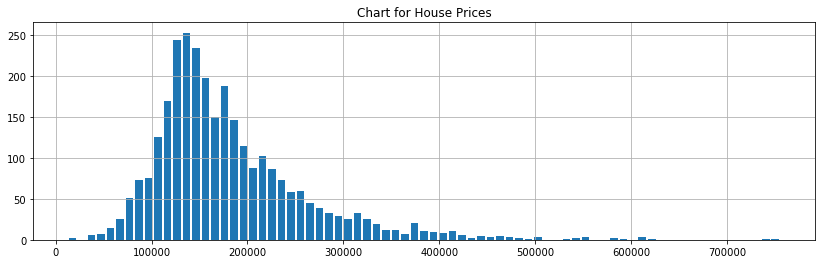

In [7]:
print('Cheapest house: ${:,.1f}'.format(df.SalePrice.min()))
print('Most Expensive house: ${:,.1f}'.format(df.SalePrice.max()))
plt.title('Chart for House Prices')
df.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.show()

Oldest house: 1872
Newest house: 2010


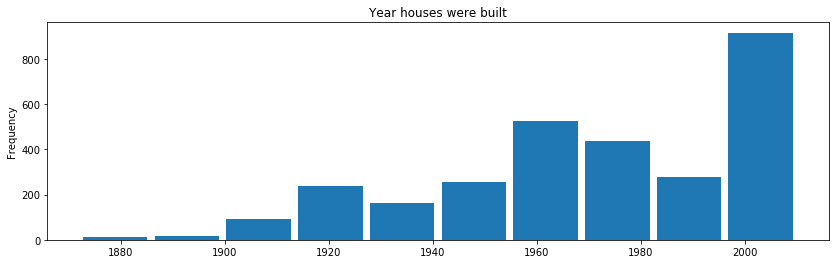

In [8]:
print('Oldest house: {}'.format(df['Year Built'].min()))
print('Newest house: {}'.format(df['Year Built'].max()))
df['Year Built'].plot(kind='hist', rwidth=.9, figsize=(14, 4))
plt.title('Year houses were built')
plt.show()

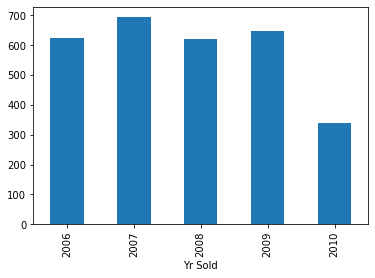

In [9]:
df.groupby(['Yr Sold']).Street.count().plot(kind='bar')

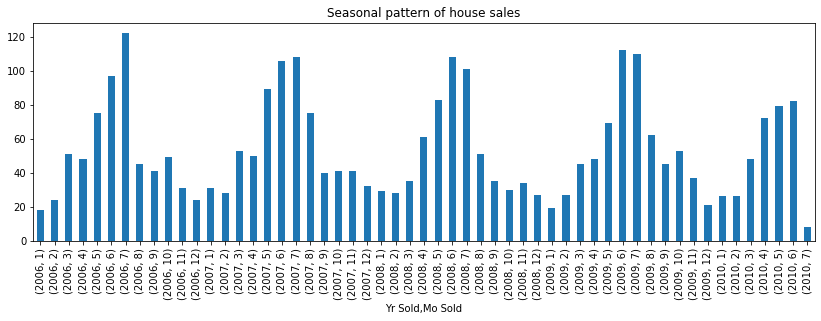

In [10]:
df.groupby(['Yr Sold', 'Mo Sold']).Order.count().plot(kind='bar', figsize=(14,4))
plt.title('Seasonal pattern of house sales')
plt.show()

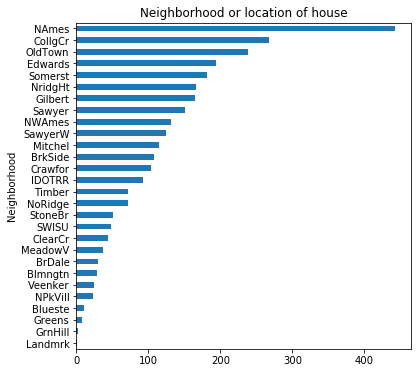

In [11]:
df.groupby('Neighborhood').Order.count().sort_values().plot(kind='barh', figsize=(6,6))
plt.title('Neighborhood or location of house')
plt.show()

The average living area: 1,500 sqft 
The largest living area: 5,642 sqft
The smallest living area: 334 sqft


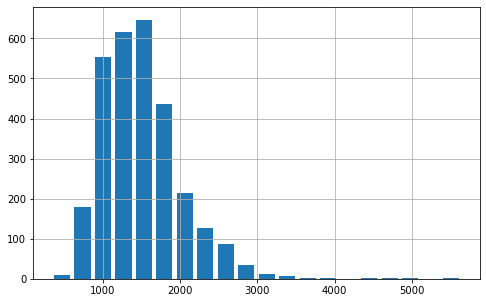

In [12]:
print('The average living area: {:,.0f} sqft '.format(df['Gr Liv Area'].mean()))
print('The largest living area: {:,.0f} sqft'. format(df['Gr Liv Area'].max()))
print('The smallest living area: {:,.0f} sqft'.format(df['Gr Liv Area'].min()))
df['Gr Liv Area'].hist( bins=20, rwidth=.8,figsize=(8,5))
plt.show()

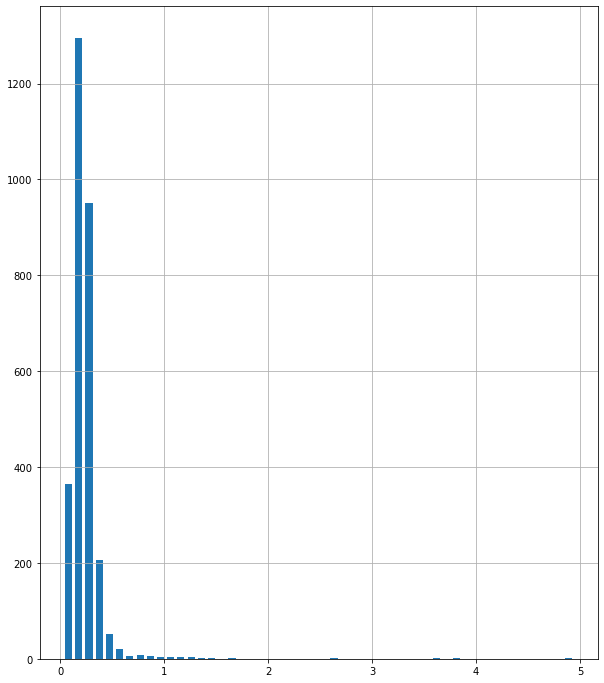

In [13]:
(df['Lot Area']/43560).hist(bins=50, rwidth=.7, figsize=(10,12))

## Univariate Analysis

In [14]:
def get_feature_groups():
    """ This reurns a list of numerical and categorical features minus the SalePrice and Order"""
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Order', 'SalePrice','PID'])
    # Categorical features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

In [15]:
print(get_feature_groups())

(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'], ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Fu

## Numericals

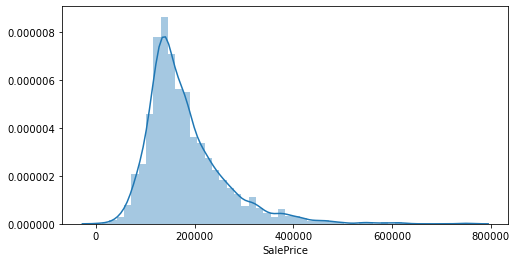

In [16]:
plt.figure(figsize=(8,4))
sns.distplot(df.SalePrice)
plt.show()

In [17]:
print(df.SalePrice.skew(), df.SalePrice.kurtosis())

1.7435000757376466 5.118899951130896


#### skewness is the measure of assymetry, 0 means both tails balance out, positive is skewed on right. kurtosis refers to 'tailedness' of the distribution, 3 is for normal distribution >3 has tails that approach zero slowly which indicate outliers

### Probability distribution plots of numerical features

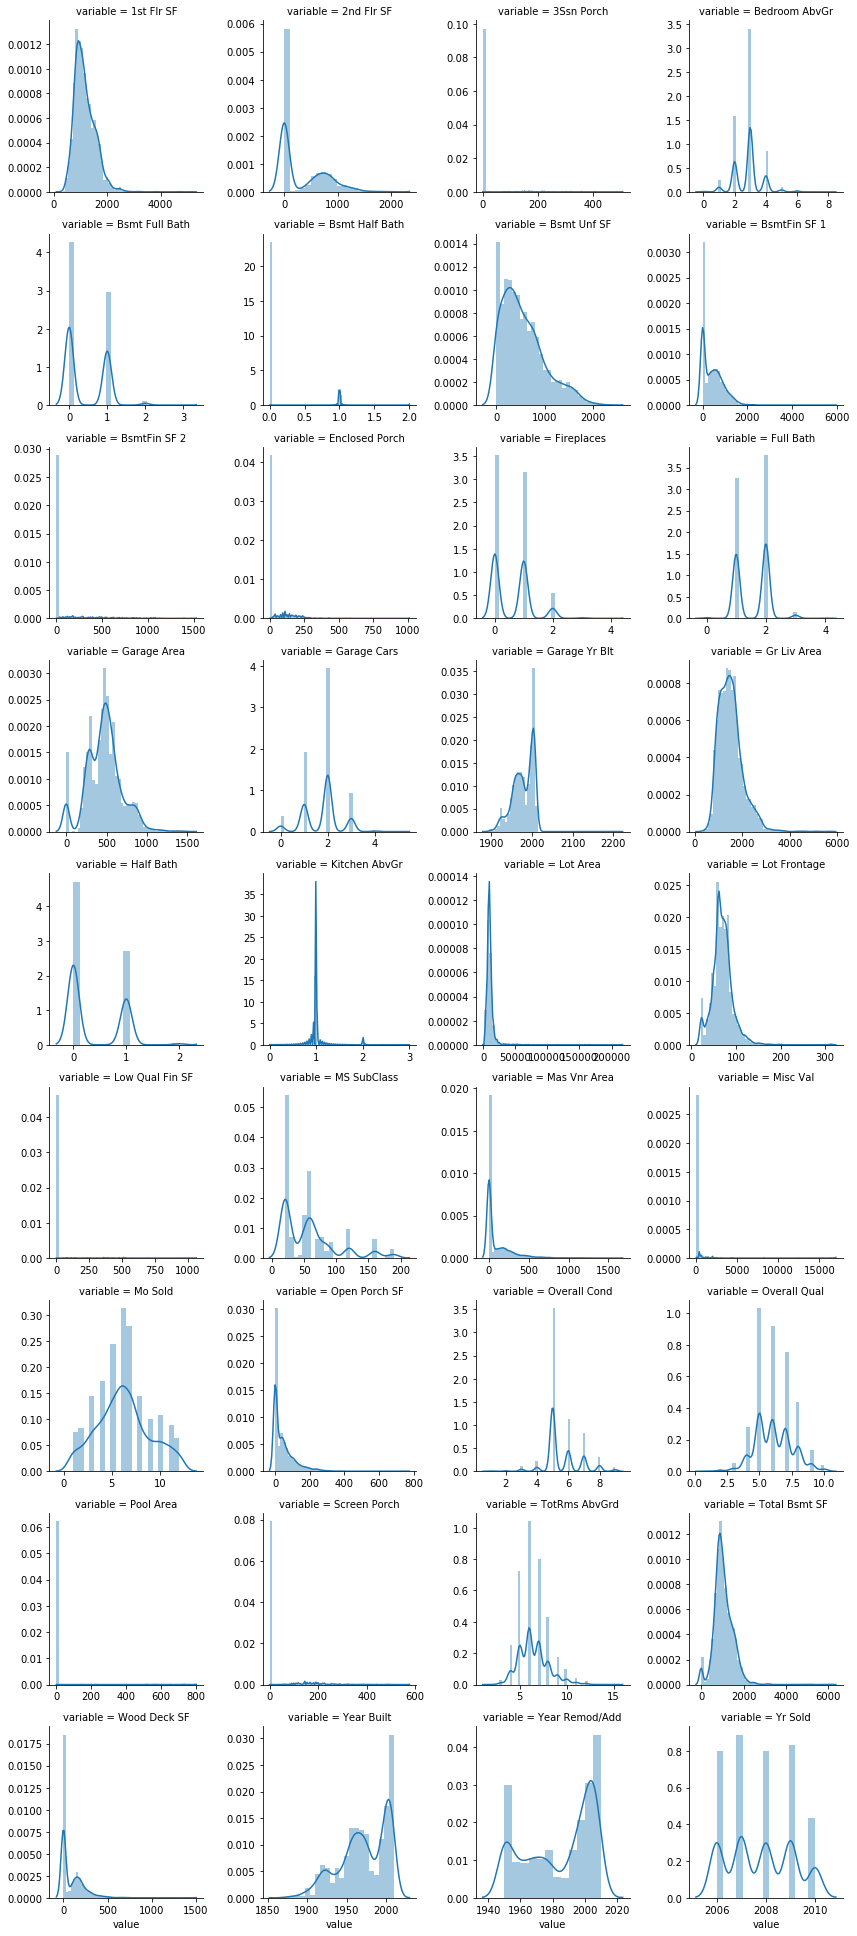

In [18]:
f = pd.melt(df, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False )
g = g.map(sns.distplot, 'value')

In [19]:
sorted(num_features)

['1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Bedroom AbvGr',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Enclosed Porch',
 'Fireplaces',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Half Bath',
 'Kitchen AbvGr',
 'Lot Area',
 'Lot Frontage',
 'Low Qual Fin SF',
 'MS SubClass',
 'Mas Vnr Area',
 'Misc Val',
 'Mo Sold',
 'Open Porch SF',
 'Overall Cond',
 'Overall Qual',
 'Pool Area',
 'Screen Porch',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Wood Deck SF',
 'Year Built',
 'Year Remod/Add',
 'Yr Sold']

## plotting the zero values

In [20]:
count_features = ['Bedroom AbvGr','Bsmt Full Bath','Bsmt Half Bath', 'Fireplaces','Full Bath','Half Bath','Kitchen AbvGr','TotRms AbvGrd','Garage Cars','Fireplaces']
non_count_features = [f for f in num_features if f not in count_features]


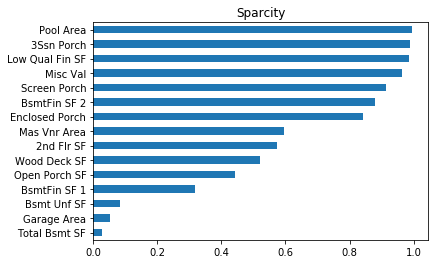

In [21]:
sparse_features = (df[non_count_features]==0).sum()/df.shape[0]
sparse_features[sparse_features>0].sort_values(ascending=True).plot(kind='barh')
plt.title('Sparcity')
plt.show()

In [22]:
# turn these columns to categorical for analysis
df['MS SubClass'] = df['MS SubClass'].apply(lambda x: str(x))
df['Mo Sold'] = df['Mo Sold'].apply(lambda x: str(x))
df['Yr Sold'] = df['Yr Sold'].apply(lambda x: str(x))

In [23]:
num_features, cat_features = get_feature_groups()

C:\Users\James\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


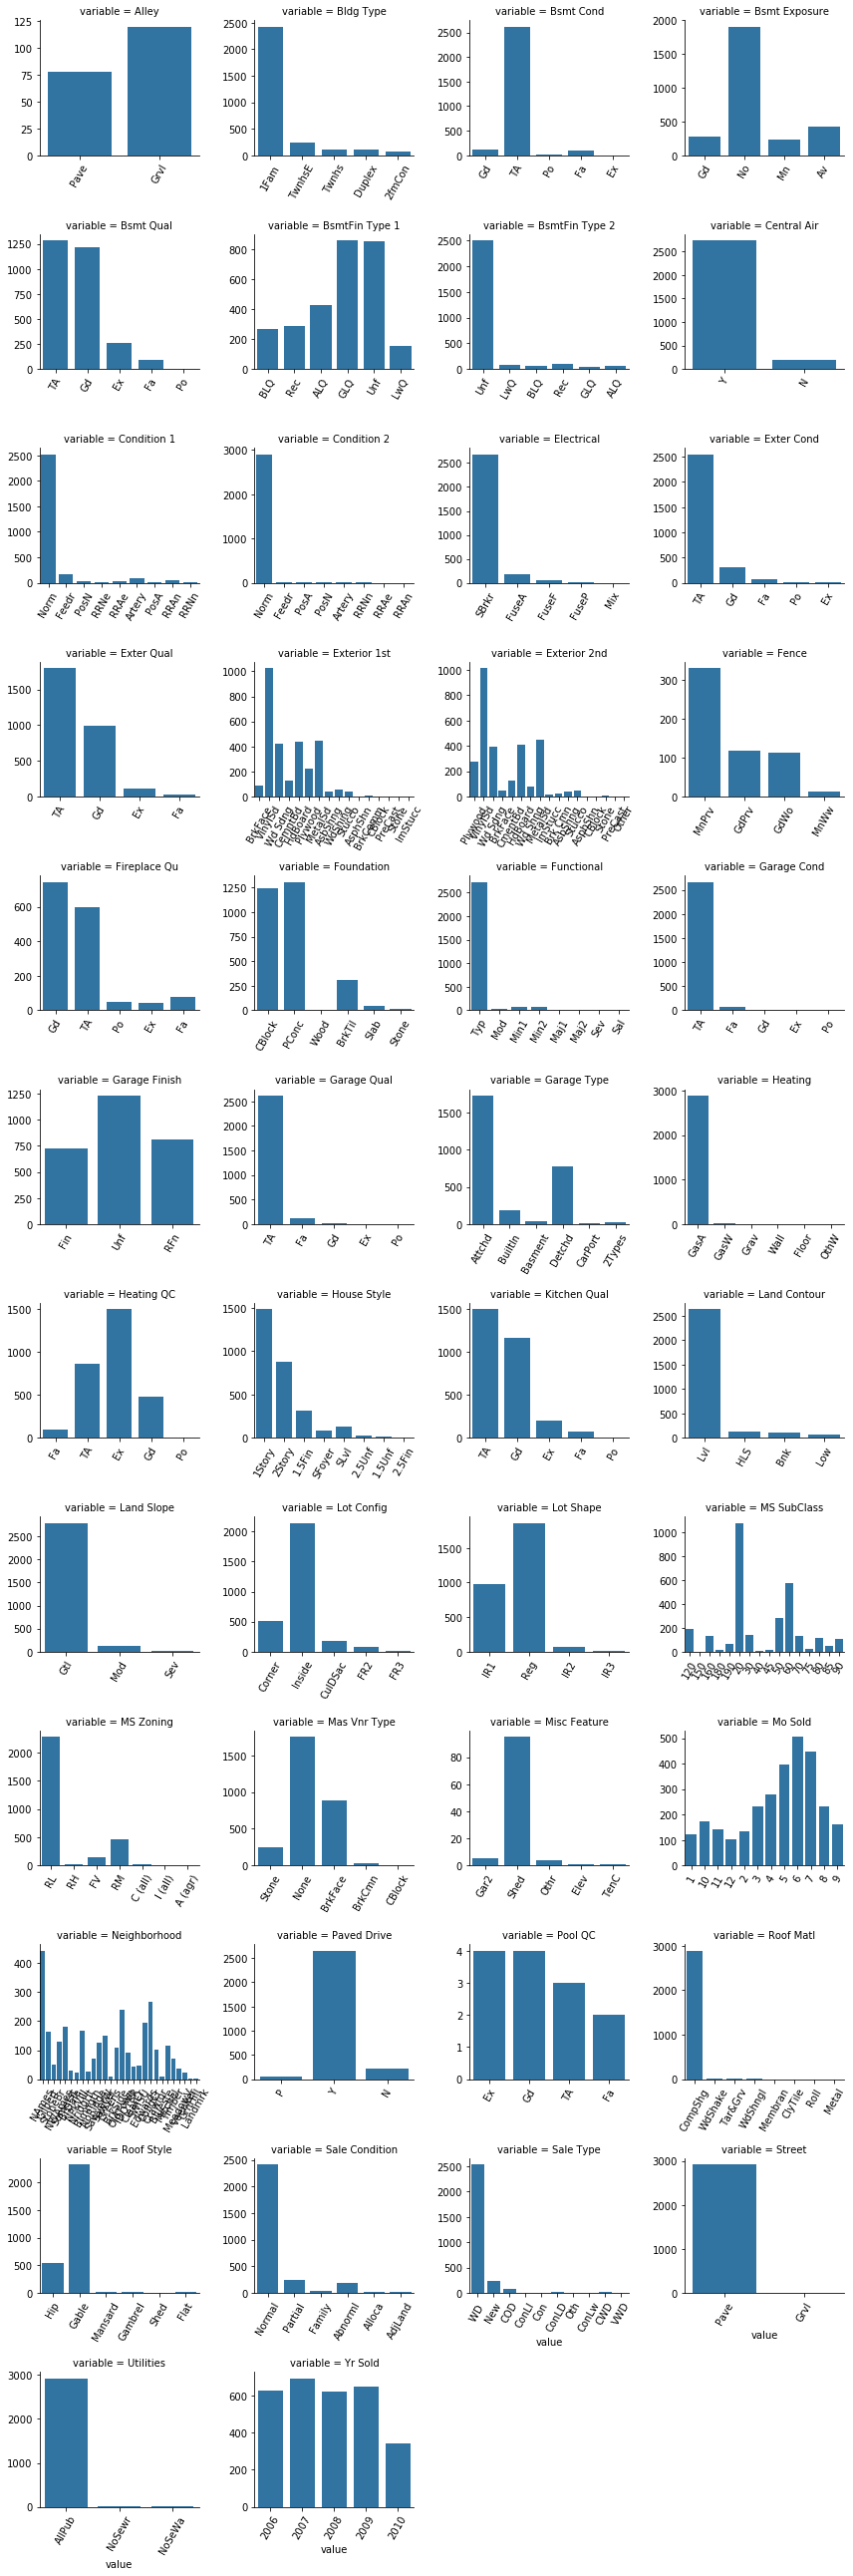

In [24]:
# count plots for categorical features
f = pd.melt(df, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g= g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


### Bivariate Analysis
Analysis of two variables for the purpose of determining the emperical relationship between them.

In [25]:
df.Alley.replace({'Grvl': 1, 'Pave':2}, inplace=True)

df['Lot Shape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
df['Land Contour'].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
df['Utilities'].replace({ 'NoSeWa':1, 'NoSewr':2, 'AllPub':3}, inplace=True)
df['Land Slope'].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
df['Exter Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Exter Cond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Bsmt Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Bsmt Cond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Bsmt Exposure'].replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
df['BsmtFin Type 1'].replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
df['BsmtFin Type 2'].replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
df['Heating QC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Kitchen Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Functional'].replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
df['Fireplace Qu'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Garage Finish'].replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
df['Garage Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Garage Cond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
df['Paved Drive'].replace({'N':1, 'P':2, 'Y':3}, inplace=True)
df['Pool QC'].replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

convert_features = ['Alley','Lot Shape', 'Land Contour', 'Utilities', 
                   'Land Slope', 'Exter Qual', 'Exter Cond','Bsmt Qual',
                   'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                   'Heating QC','Kitchen Qual','Functional','Fireplace Qu',
                   'Garage Finish','Garage Qual','Garage Cond','Paved Drive',
                   'Pool QC']

df[convert_features]=df[convert_features].fillna(0)

num_features, cat_features = get_feature_groups()

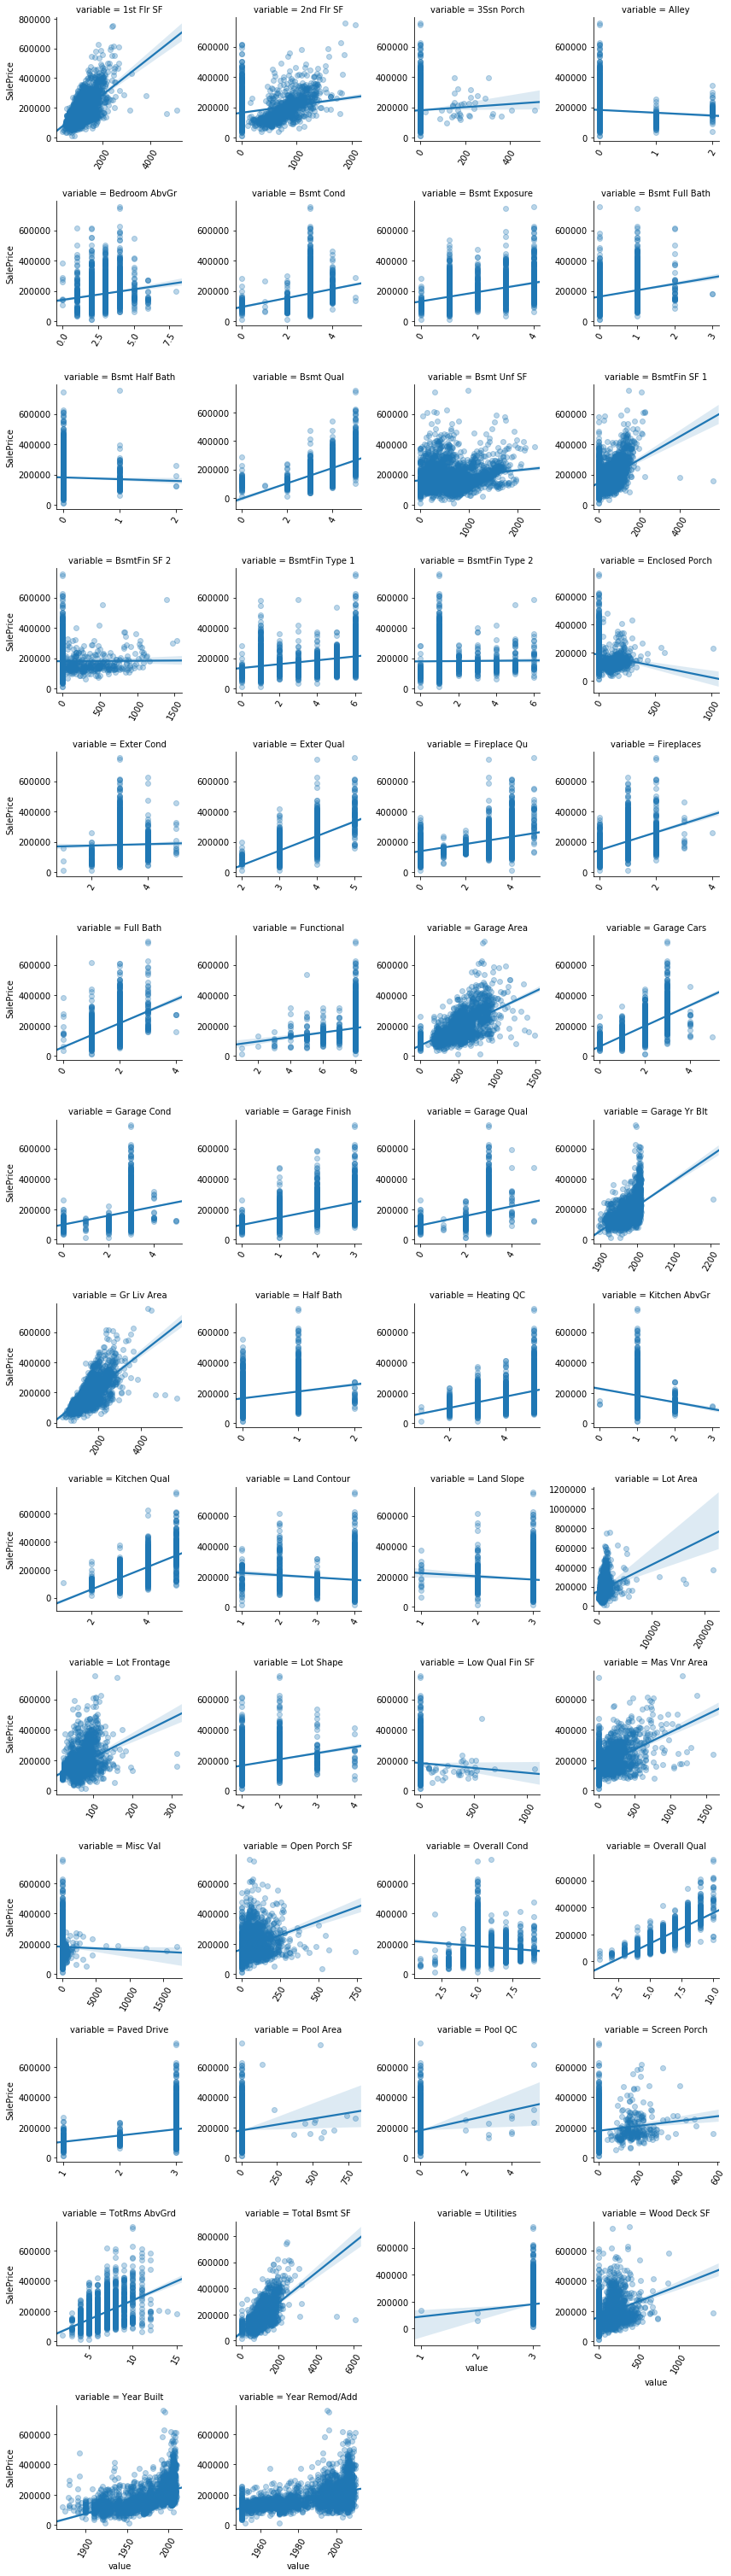

In [26]:
# create one dataframe with SalePrice, columns and values
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(num_features))
# Initialize a grid of facets 
g = sns.FacetGrid(f,col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
# Draw a plot on each facet
g=g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

### Transform to get a linear relationship

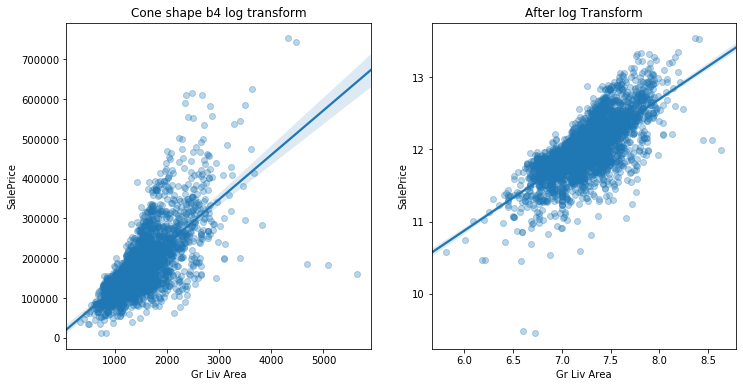

In [27]:
"""Log transform can help make a relationship clear. It helps make patterns
    in the data interpretable to meet assumptions in inferential statistics"""
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(df['Gr Liv Area'], df['SalePrice'], scatter_kws={'alpha':0.3})
plt.title('Cone shape b4 log transform')

plt.subplot(122)
sns.regplot(np.log1p(df['Gr Liv Area']), np.log1p(df['SalePrice']), scatter_kws={'alpha':0.3})
plt.title('After log Transform')
plt.show()

In [28]:
print(cat_features)

['MS SubClass', 'MS Zoning', 'Street', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Fence', 'Misc Feature', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition']


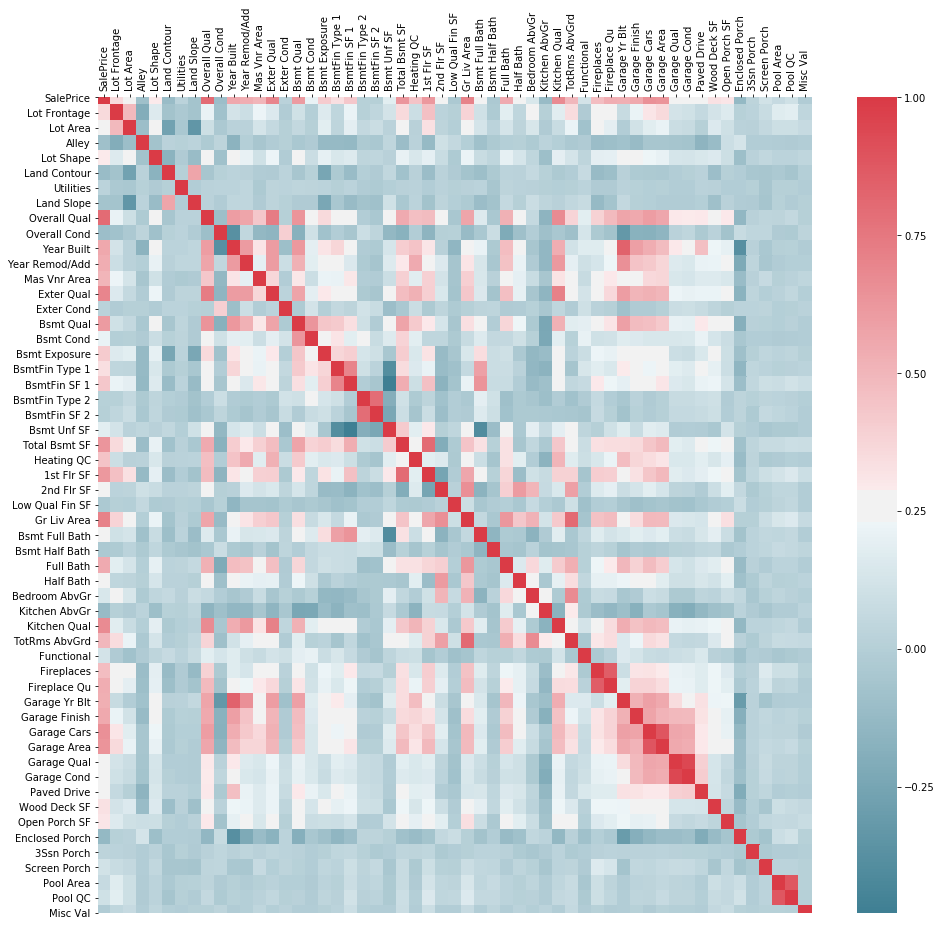

In [29]:
corr = df[['SalePrice']+num_features].corr()
fig = plt.figure(figsize=(16,15))
ax= fig.add_subplot(111)
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

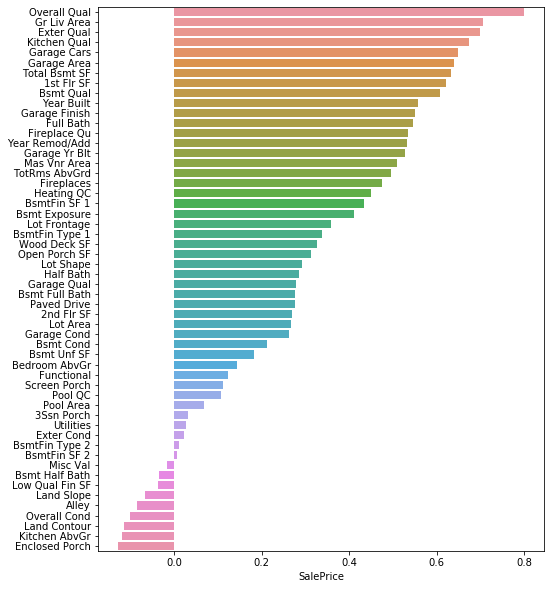

In [30]:
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()
# shows most correlated feature descending 

#### Note to self: read about multicollinearity

C:\Users\James\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\James\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


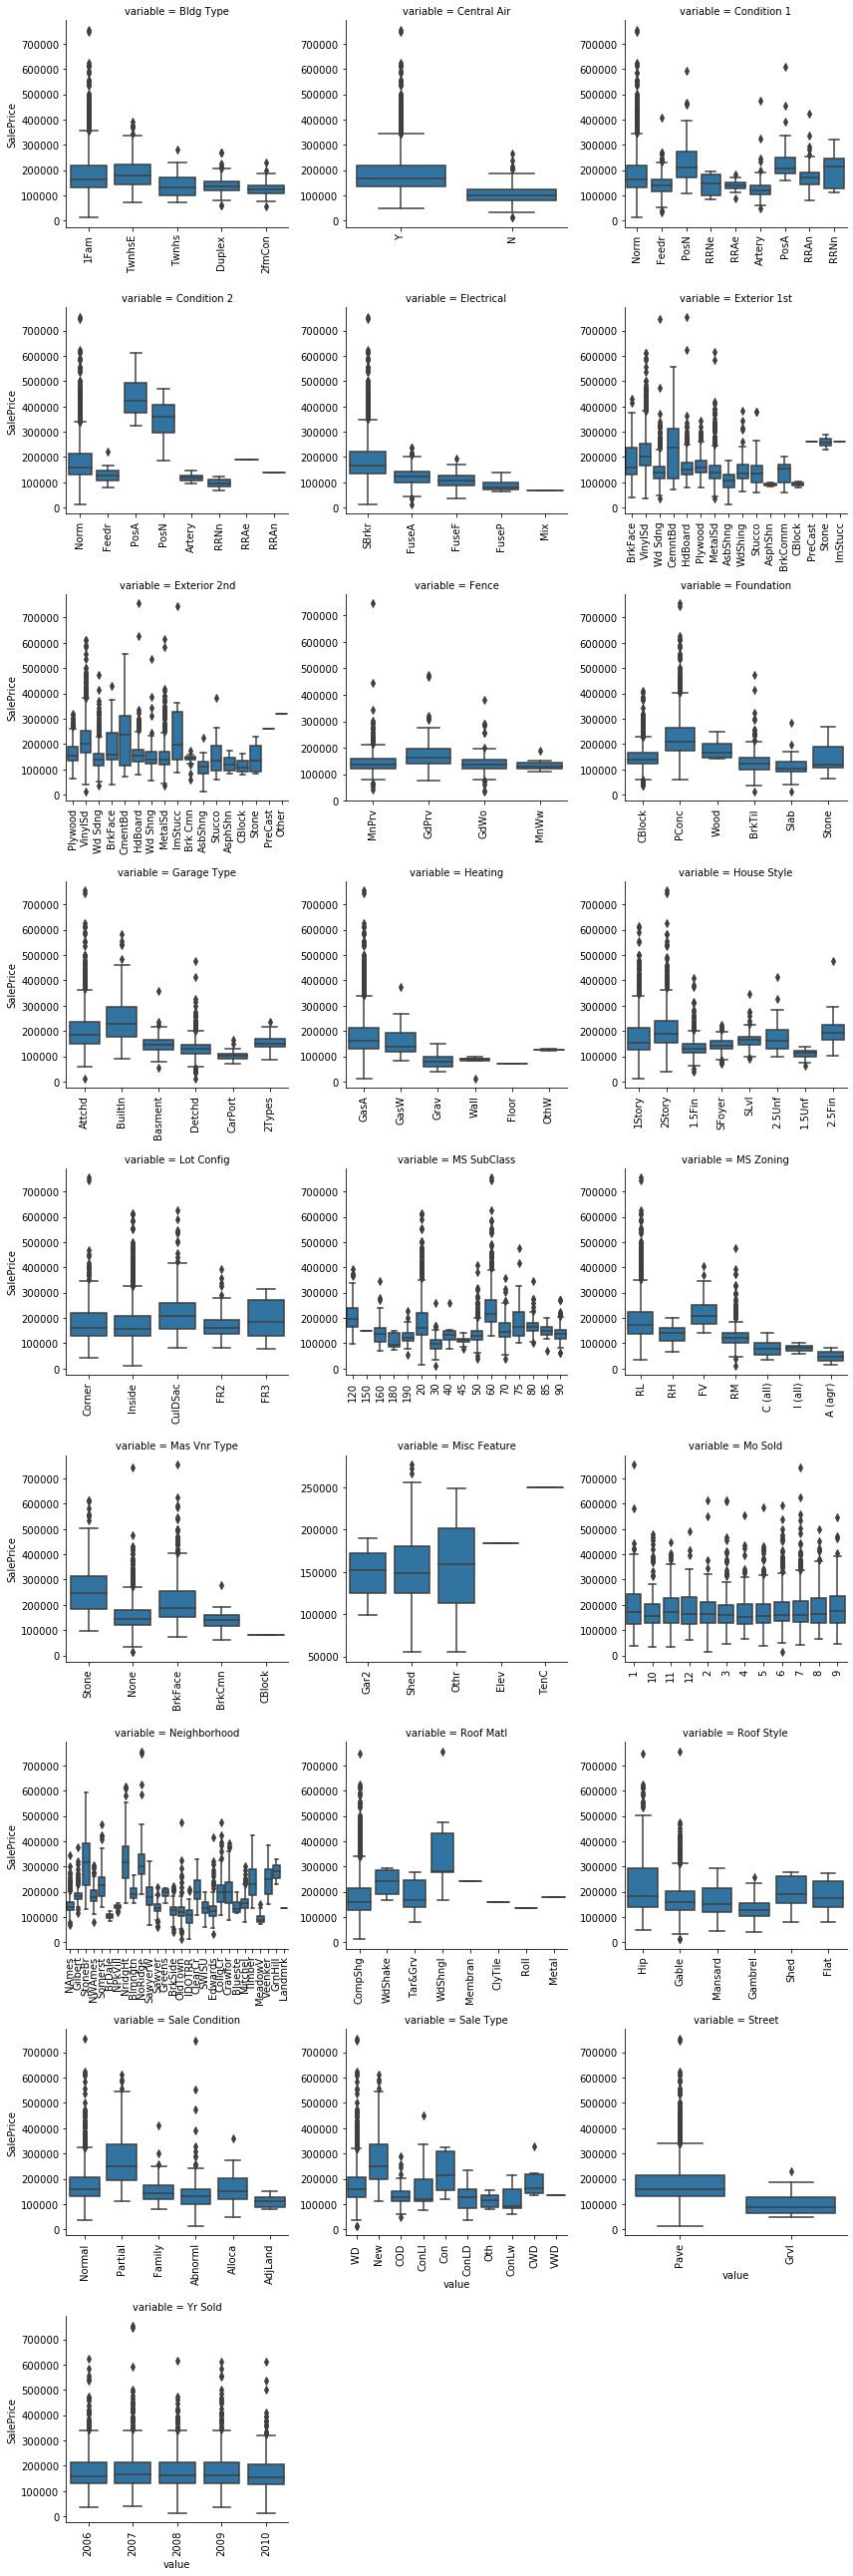

In [31]:
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f,col='variable', col_wrap=3, sharex=False,sharey=False, size=4)
g =g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [32]:
pd.isnull(df[cat_features]).sum()

MS SubClass          0
MS Zoning            0
Street               0
Lot Config           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Foundation           0
Heating              0
Central Air          0
Electrical           1
Garage Type        157
Fence             2358
Misc Feature      2824
Mo Sold              0
Yr Sold              0
Sale Type            0
Sale Condition       0
dtype: int64

In [33]:
import scipy.stats

In [34]:
import math

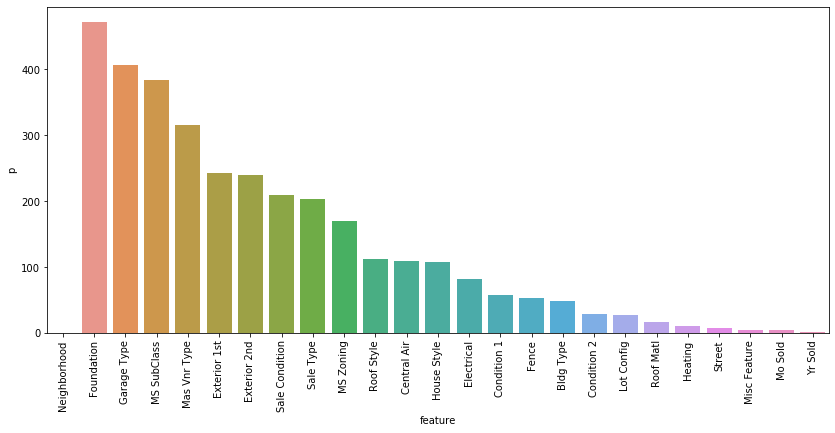

In [35]:
# fill all missing values
df[cat_features]= df[cat_features].fillna('Missing')

# create dictionary of lists 
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in df[cat].unique():
        group_prices.append(df[df[cat]== group]
['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)

anova = pd.DataFrame(anova)
anova = anova[['feature', 'f','p']]
anova.sort_values('p', inplace=True)
# plot

plt.figure(figsize=(14,6))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()


In [36]:
np.log(1./anova['p'])

4            inf
14    471.793194
18    407.047145
0     384.047797
13    315.915835
11    242.854486
12    240.238101
24    208.697093
23    203.700893
1     170.295533
9     111.963339
16    109.077762
8     107.113363
17     81.894820
5      56.651780
19     52.831766
7      47.447674
6      28.241608
3      27.590626
10     16.842216
15     10.482487
2       6.670679
20      4.173180
21      3.472816
22      1.667514
Name: p, dtype: float64

In [37]:
# can't understand inf value?

## Missing Values

In [38]:
# count all categorical features with 'Missing' values
missing_values=(df[cat_features]=='Missing').sum().sort_values(ascending=False)
missing_values

Misc Feature      2824
Fence             2358
Garage Type        157
Mas Vnr Type        23
Electrical           1
Sale Condition       0
Roof Style           0
MS Zoning            0
Street               0
Lot Config           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Exterior 2nd         0
Roof Matl            0
Exterior 1st         0
Sale Type            0
Foundation           0
Heating              0
Central Air          0
Mo Sold              0
Yr Sold              0
MS SubClass          0
dtype: int64

In [39]:
missing_values[missing_values > 0]

Misc Feature    2824
Fence           2358
Garage Type      157
Mas Vnr Type      23
Electrical         1
dtype: int64

In [40]:
df.loc[df.Electrical == 'Missing', 'Electrical'] = df.Electrical.mode()[0]

In [41]:
# We have None and Missing
df['Mas Vnr Type'].value_counts()

None       1752
BrkFace     880
Stone       249
BrkCmn       25
Missing      23
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [42]:
# replace missing with none
df['Mas Vnr Type'].replace({'Missing':'None'}, inplace = True)

In [43]:
# discrepancy in the data
# some houses that had a 'Mas Vnr Type' == None had a 'Mas Vnr Area > 0'

df.loc[(df['Mas Vnr Type']=='None')& (df['Mas Vnr Area']>1), 'Mas Vnr Type']='BrkFace'  

In [44]:
df.loc[(df['Mas Vnr Type']=='None')&(df['Mas Vnr Area']==1),'Mas Vnr Area'] = 0



In [45]:
# loop to get select each type of Veneer with a veneer area of 0 and replace with the mean of that type of veneer area. 
for vnr_type in df['Mas Vnr Type'].unique():
    df.loc[(df['Mas Vnr Type']== vnr_type) & (df['Mas Vnr Area']==0), 'Mas Vnr Area'] = df[df['Mas Vnr Type']==vnr_type]['Mas Vnr Area'].mean()

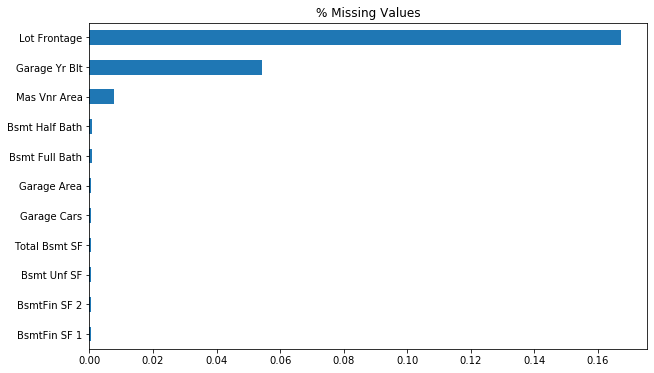

In [46]:
missing_data = df.isnull().sum()/df.shape[0]
missing_data[missing_data>0].sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title('% Missing Values')
plt.show()

In [47]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

In [48]:
# 'Mas Vnr Area' if missing then probably 0
df['Mas Vnr Area'].fillna(0, inplace = True)

In [49]:
# same with 'Garage Area'
df['Garage Area'].fillna(0, inplace = True)

In [50]:
pd.set_option('display.max_columns', 82)
df[df['Garage Yr Blt'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,28,527425090,20,RL,70.0,10500,Pave,0.0,1,4,3,FR2,3,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3.0,3.0,1.0,5.0,432.0,1.0,0.0,432.0,864.0,GasA,3,Y,SBrkr,864,0,0,864,0.0,0.0,1,0,3,1,3,5,8,1,1.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,4,2010,ConLI,Normal,115000
119,120,534276360,20,RL,77.0,9320,Pave,0.0,2,4,3,Inside,3,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3.0,3.0,1.0,5.0,569.0,1.0,0.0,381.0,950.0,GasA,2,Y,SBrkr,1225,0,0,1225,1.0,0.0,1,1,3,1,3,6,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,352,0,0,0,0,0,0.0,Missing,Shed,400,1,2010,WD,Normal,128950
125,126,534427010,90,RL,98.0,13260,Pave,0.0,2,4,3,Inside,3,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3.0,3.0,1.0,4.0,1500.0,1.0,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,3,10,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,1,2010,Oth,Abnorml,84900
129,130,534450180,20,RL,50.0,7207,Pave,0.0,2,4,3,Inside,3,BrkSide,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,4,CBlock,3.0,3.0,4.0,4.0,696.0,1.0,0.0,162.0,858.0,GasA,4,Y,SBrkr,858,0,0,858,1.0,0.0,1,0,2,1,3,4,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,117,0,0,0,0,0,0.0,Missing,Missing,0,2,2010,WD,Normal,116500
130,131,534451150,30,RL,55.0,5350,Pave,0.0,2,4,3,Inside,3,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,1,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,728.0,728.0,GasA,5,Y,SBrkr,1306,0,0,1306,0.0,0.0,1,0,3,1,2,6,5,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,263,0,0,0,0,0,0.0,GdWo,Shed,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2914,923226180,180,RM,21.0,1470,Pave,0.0,1,4,3,Inside,3,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,4.0,3.0,3.0,6.0,522.0,1.0,0.0,108.0,630.0,GasA,3,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,3,3,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,4,2006,WD,Normal,73000
2916,2917,923228130,180,RM,21.0,1533,Pave,0.0,1,4,3,Inside,3,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,4.0,3.0,3.0,6.0,553.0,1.0,0.0,77.0,630.0,GasA,5,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,5,3,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,8,2006,WD,Abnorml,92000
2918,2919,923228210,160,RM,21.0,1526,Pave,0.0,1,4,3,Inside,3,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,546.0,546.0,GasA,3,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,34,0,0,0,0,0.0,GdPrv,Missin

In [51]:
# similar number as Nan 'Garage Yr Blt'
df[df['Garage Type']=='Missing']

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,28,527425090,20,RL,70.0,10500,Pave,0.0,1,4,3,FR2,3,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3.0,3.0,1.0,5.0,432.0,1.0,0.0,432.0,864.0,GasA,3,Y,SBrkr,864,0,0,864,0.0,0.0,1,0,3,1,3,5,8,1,1.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,4,2010,ConLI,Normal,115000
119,120,534276360,20,RL,77.0,9320,Pave,0.0,2,4,3,Inside,3,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3.0,3.0,1.0,5.0,569.0,1.0,0.0,381.0,950.0,GasA,2,Y,SBrkr,1225,0,0,1225,1.0,0.0,1,1,3,1,3,6,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,352,0,0,0,0,0,0.0,Missing,Shed,400,1,2010,WD,Normal,128950
125,126,534427010,90,RL,98.0,13260,Pave,0.0,2,4,3,Inside,3,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3.0,3.0,1.0,4.0,1500.0,1.0,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,1728,2.0,0.0,2,0,6,2,3,10,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,1,2010,Oth,Abnorml,84900
129,130,534450180,20,RL,50.0,7207,Pave,0.0,2,4,3,Inside,3,BrkSide,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,4,CBlock,3.0,3.0,4.0,4.0,696.0,1.0,0.0,162.0,858.0,GasA,4,Y,SBrkr,858,0,0,858,1.0,0.0,1,0,2,1,3,4,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,117,0,0,0,0,0,0.0,Missing,Missing,0,2,2010,WD,Normal,116500
130,131,534451150,30,RL,55.0,5350,Pave,0.0,2,4,3,Inside,3,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,1,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,728.0,728.0,GasA,5,Y,SBrkr,1306,0,0,1306,0.0,0.0,1,0,3,1,2,6,5,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,263,0,0,0,0,0,0.0,GdWo,Shed,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2914,923226180,180,RM,21.0,1470,Pave,0.0,1,4,3,Inside,3,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,4.0,3.0,3.0,6.0,522.0,1.0,0.0,108.0,630.0,GasA,3,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,3,3,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,4,2006,WD,Normal,73000
2916,2917,923228130,180,RM,21.0,1533,Pave,0.0,1,4,3,Inside,3,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,4.0,3.0,3.0,6.0,553.0,1.0,0.0,77.0,630.0,GasA,5,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,5,3,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,8,2006,WD,Abnorml,92000
2918,2919,923228210,160,RM,21.0,1526,Pave,0.0,1,4,3,Inside,3,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,1.0,1.0,0.0,1.0,0.0,546.0,546.0,GasA,3,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,8,0,0.0,Missing,NaN,0.0,0.0,0.0,0.0,0.0,3,0,34,0,0,0,0,0.0,GdPrv,Missin

In [52]:
df['Garage Yr Blt'].fillna(0, inplace=True)

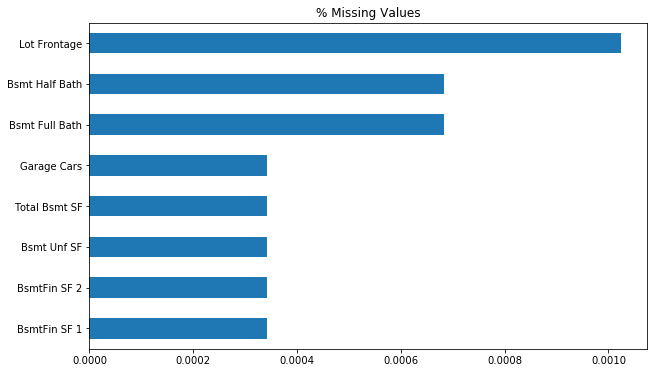

In [53]:
missing_data = df.isnull().sum()/df.shape[0]
missing_data[missing_data>0].sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title('% Missing Values')
plt.show()

In [54]:
df[df['Lot Frontage'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,2257,916253320,120,RM,NaN,9763,Pave,0.0,2,4,3,Inside,3,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,4,3,PConc,4.0,3.0,1.0,6.0,1102.0,5.0,72.0,328.0,1502.0,GasA,5,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,4,5,8,1,3.0,Attchd,1998.0,3.0,1.0,286.0,3.0,3.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,9,2007,WD,Normal,330000
2788,2789,907230240,160,RH,NaN,3612,Pave,0.0,2,4,3,Inside,3,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,6.0,338.0,1.0,0.0,292.0,630.0,GasA,5,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,3,5,8,0,0.0,Detchd,1993.0,1.0,2.0,484.0,3.0,3.0,3,0,48,0,0,0,0,0.0,MnPrv,Missing,0,6,2006,WD,Normal,137000
2892,2893,916252170,120,RM,NaN,8239,Pave,0.0,2,4,3,Inside,3,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,4,3,CBlock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GasA,4,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,4,5,8,0,0.0,Attchd,1986.0,2.0,1.0,312.0,3.0,3.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,11,2006,WD,Normal,230000


In [55]:
df.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [56]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [57]:
df[df['Lot Frontage'].isnull()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2256,2257,916253320,120,RM,NaN,9763,Pave,0.0,2,4,3,Inside,3,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,4,3,PConc,4.0,3.0,1.0,6.0,1102.0,5.0,72.0,328.0,1502.0,GasA,5,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,4,5,8,1,3.0,Attchd,1998.0,3.0,1.0,286.0,3.0,3.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,9,2007,WD,Normal,330000
2788,2789,907230240,160,RH,NaN,3612,Pave,0.0,2,4,3,Inside,3,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,6.0,338.0,1.0,0.0,292.0,630.0,GasA,5,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,3,5,8,0,0.0,Detchd,1993.0,1.0,2.0,484.0,3.0,3.0,3,0,48,0,0,0,0,0.0,MnPrv,Missing,0,6,2006,WD,Normal,137000
2892,2893,916252170,120,RM,NaN,8239,Pave,0.0,2,4,3,Inside,3,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,4,3,CBlock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GasA,4,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,4,5,8,0,0.0,Attchd,1986.0,2.0,1.0,312.0,3.0,3.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,11,2006,WD,Normal,230000


In [58]:
df['Lot Frontage'].dropna(inplace=True)

In [59]:
df['Lot Frontage'].isnull().sum()

0

In [60]:
df.isnull().sum().sort_values(ascending=False)

Lot Frontage      3
Bsmt Full Bath    2
Bsmt Half Bath    2
Bsmt Unf SF       1
Garage Cars       1
                 ..
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Fireplace Qu      0
Order             0
Length: 82, dtype: int64

In [61]:
df.dropna(inplace=True)

In [62]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        0
Year Built       0
Roof Style       0
Roof Matl        0
Exterior 1st     0
                ..
TotRms AbvGrd    0
Functional       0
Fireplaces       0
Fireplace Qu     0
Order            0
Length: 82, dtype: int64

## Outliers

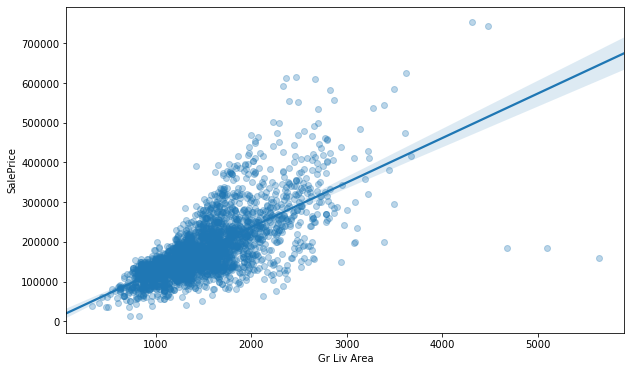

In [63]:

plt.figure(figsize=(10,6))
sns.regplot(df['Gr Liv Area'], df.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [64]:
df['Sale Condition'].value_counts()

Normal     2409
Partial     245
Abnorml     189
Family       46
Alloca       23
AdjLand      12
Name: Sale Condition, dtype: int64

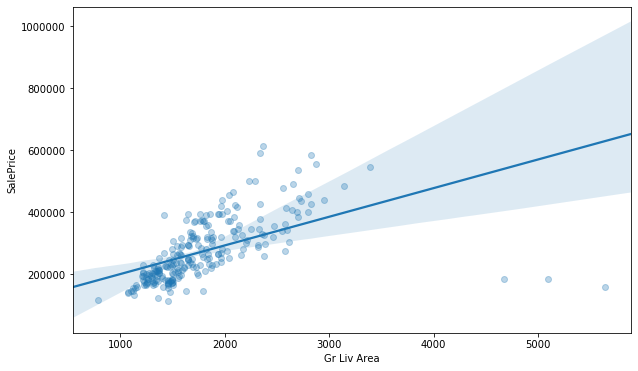

In [65]:
plt.figure(figsize=(10,6))
sns.regplot(df[df['Sale Condition']=='Partial']['Gr Liv Area'],df[df['Sale Condition']=='Partial']['SalePrice'],scatter_kws={'alpha':0.3})
plt.show()

In [66]:
df.drop(df[df['Gr Liv Area']>=4000].index,inplace=True)

In [67]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.000000,31770,Pave,0.0,2,4,3,Corner,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,3,3,CBlock,3.0,4.0,4.0,4.0,639.0,1.0,0.0,441.0,1080.0,GasA,2,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,8,2,4.0,Attchd,1960.0,3.0,2.0,528.0,3.0,3.0,2,210,62,0,0,0,0,0.0,Missing,Missing,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.000000,11622,Pave,0.0,1,4,3,Inside,3,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3.0,3.0,1.0,3.0,468.0,2.0,144.0,270.0,882.0,GasA,3,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3,5,8,0,0.0,Attchd,1961.0,1.0,1.0,730.0,3.0,3.0,3,140,0,0,0,120,0,0.0,MnPrv,Missing,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.000000,14267,Pave,0.0,2,4,3,Corner,3,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3.0,3.0,1.0,5.0,923.0,1.0,0.0,406.0,1329.0,GasA,3,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,8,0,0.0,Attchd,1958.0,1.0,1.0,312.0,3.0,3.0,3,393,36,0,0,0,0,0.0,Missing,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.000000,11160,Pave,0.0,1,4,3,Corner,3,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,4,3,CBlock,3.0,3.0,1.0,5.0,1065.0,1.0,0.0,1045.0,2110.0,GasA,5,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,5,8,8,2,3.0,Attchd,1968.0,3.0,2.0,522.0,3.0,3.0,3,0,0,0,0,0,0,0.0,Missing,Missing,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.000000,13830,Pave,0.0,2,4,3,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,1.0,6.0,791.0,1.0,0.0,137.0,928.0,GasA,4,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,8,1,3.0,Attchd,1997.0,3.0,2.0,482.0,3.0,3.0,3,212,34,0,0,0,0,0.0,MnPrv,Missing,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.000000,7937,Pave,0.0,2,4,3,CulDSac,3,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,3.0,3.0,3.0,6.0,819.0,1.0,0.0,184.0,1003.0,GasA,3,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,3,6,8,0,0.0,Detchd,1984.0,1.0,2.0,588.0,3.0,3.0,3,120,0,0,0,0,0,0.0,GdPrv,Missing,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,75.144444,8885,Pave,0.0,2,1,3,Inside,2,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,3,3,CBlock,4.0,3.0,3.0,4.0,301.0,5.0,324.0,239.0,864.0,GasA,3,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,3,5,8,0,0.0,Attchd,1983.0,1.0,2.0,484.0,3.0,3.0,3,164,0,0,0,0,0,0.0,MnPrv,Missing,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.000000,10441,Pave,0.0,1,4,3,Inside,3,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,3,PConc,4.0,3.0,3.0,6.0,337.0,1.0,0.0,575.0,912.0,GasA,3,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,8,0,0

## Add Features

In [68]:
# Total Square Footage
df['TotalSF'] = df['Total Bsmt SF'] + df['Gr Liv Area']
df['TotalFloorSF']=df['1st Flr SF'] + df['2nd Flr SF']
df['TotalPorchSF']=df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch']+df['Screen Porch']

# Total Bathrooms
df['Total Bathrooms']= df['Full Bath'] + .5*df['Half Bath']+ df['Bsmt Full Bath'] + .5 * df['Bsmt Half Bath']


### Booleans

In [69]:
df['Has Basement'] = df['Total Bsmt SF'].apply(lambda x: 1 if x>0 else 0)
df['Has Garage'] = df['Garage Area'].apply(lambda x:1 if x > 0 else 0)
df['Has Porch'] = df['TotalPorchSF'].apply(lambda x: 1 if x>0 else 0)
df['Has Pool'] = df['Pool Area'].apply(lambda x:1 if x>0 else 0)
# Produces a boolean of True or False if condition is not met
df['Was Remodelled'] = (df['Year Remod/Add'] != df['Year Built'].astype(np.int64))
# Produces a 0 or 1 if condition is not met
df['Is New'] = (df['Year Built']>2000).astype(np.int64)
df['Was Completed'] = (df['Sale Condition'] != 'Partial').astype(np.int64)

boolean_features = ['Has Basement','Has Garage', 'Has Porch', 'Has Pool', 'Was Remodelled', 'Is New', 'Was Completed']

In [70]:
num_features,cat_features = get_feature_groups()
num_features = [f for f in num_features if f not in boolean_features]

### Log transform
Transform numerical features that show positive skew

In [71]:
features = num_features + ['SalePrice']
for f in features:
    
    df.loc[:,f] = np.log1p(df[f])

In [72]:
pd.set_option('display.max_columns', 100)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,Total Bathrooms,Has Basement,Has Garage,Has Porch,Has Pool,Was Remodelled,Is New,Was Completed
0,1,526301100,20,RL,4.955827,10.366309,Pave,0.0,1.098612,1.609438,1.386294,Corner,1.386294,NAmes,Norm,Norm,1Fam,1Story,1.945910,1.791759,7.581210,7.581210,Hip,CompShg,BrkFace,Plywood,Stone,4.727388,1.386294,1.386294,CBlock,1.386294,1.609438,1.609438,1.609438,6.461468,0.693147,0.000000,6.091310,6.985642,GasA,1.098612,Y,SBrkr,7.412764,0.000000,0.0,7.412764,0.693147,0.0,0.693147,0.000000,1.386294,0.693147,1.386294,2.079442,2.197225,1.098612,1.609438,Attchd,7.581210,1.386294,1.098612,6.270988,1.386294,1.386294,1.098612,5.351858,4.143135,0.0,0.0,0.000000,0.0,0.0,Missing,Missing,0.000000,5,2010,WD,Normal,12.278398,7.914618,7.412764,4.143135,1.098612,1,1,1,0,False,0,1
1,2,526350040,20,RH,4.394449,9.360741,Pave,0.0,0.693147,1.609438,1.386294,Inside,1.386294,NAmes,Feedr,Norm,1Fam,1Story,1.791759,1.945910,7.581720,7.581720,Gable,CompShg,VinylSd,VinylSd,None,0.000000,1.386294,1.386294,CBlock,1.386294,1.386294,0.693147,1.386294,6.150603,1.098612,4.976734,5.602119,6.783325,GasA,1.386294,Y,SBrkr,6.799056,0.000000,0.0,6.799056,0.000000,0.0,0.693147,0.000000,1.098612,0.693147,1.386294,1.791759,2.197225,0.000000,0.000000,Attchd,7.581720,0.693147,0.693147,6.594413,1.386294,1.386294,1.386294,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.0,MnPrv,Missing,0.000000,6,2010,WD,Normal,11.561725,7.483807,6.799056,4.795791,0.693147,1,1,1,0,False,0,1
2,3,526351010,20,RL,4.406719,9.565775,Pave,0.0,1.098612,1.609438,1.386294,Corner,1.386294,NAmes,Norm,Norm,1Fam,1Story,1.945910,1.945910,7.580189,7.580189,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,4.691348,1.386294,1.386294,CBlock,1.386294,1.386294,0.693147,1.791759,6.828712,0.693147,0.000000,6.008813,7.192934,GasA,1.386294,Y,SBrkr,7.192934,0.000000,0.0,7.192934,0.000000,0.0,0.693147,0.693147,1.386294,0.693147,1.609438,1.945910,2.197225,0.000000,0.000000,Attchd,7.580189,0.693147,0.693147,5.746203,1.386294,1.386294,1.386294,5.976351,3.610918,0.0,0.0,0.000000,0.0,0.0,Missing,Gar2,9.433564,6,2010,WD,Normal,12.055256,7.885705,7.192934,3.610918,0.916291,1,1,1,0,False,0,1
3,4,526353030,20,RL,4.543295,9.320181,Pave,0.0,0.693147,1.609438,1.386294,Corner,1.386294,NAmes,Norm,Norm,1Fam,1Story,2.079442,1.791759,7.585281,7.585281,Hip,CompShg,BrkFace,BrkFace,None,0.000000,1.609438,1.386294,CBlock,1.386294,1.386294,0.693147,1.791759,6.971669,0.693147,0.000000,6.952729,7.654917,GasA,1.791759,Y,SBrkr,7.654917,0.000000,0.0,7.654917,0.693147,0.0,1.098612,0.693147,1.386294,0.693147,1.791759,2.197225,2.197225,1.098612,1.386294,Attchd,7.585281,1.386294,1.098612,6.259581,1.386294,1.386294,1.386294,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,Missing,Missing,0.000000,4,2010,WD,Normal,12.404928,8.347827,7.654917,0.000000,1.504077,1,1,0,0,False,0,1
4,5,527105010,60,RL,4.317488,9.534668,Pave,0.0,1.098612,1.609438,1.386294,Inside,1.386294,Gilbert,Norm,Norm,1Fam,2Story,1.791759,1.791759,7.599902,7.600402,Gable,CompShg,VinylSd,VinylSd,None,0.000000,1.386294,1.386294,PConc,1.609438,1.386294,0.6

In [73]:
print(len(df.columns))


93


In [74]:
df['SalePrice']

0       12.278398
1       11.561725
2       12.055256
3       12.404928
4       12.154258
          ...    
2925    11.867104
2926    11.782960
2927    11.790565
2928    12.043560
2929    12.144203
Name: SalePrice, Length: 2919, dtype: float64

## Dummy Variables

In [75]:
y = df.SalePrice
df.drop('SalePrice', axis=1, inplace=True)
df.drop(['Order','PID'], axis=1, inplace=True )

In [76]:
model_data = pd.get_dummies(df).copy()

## Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    model_data.copy(), y, test_size=0.33, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

Shapes
X_train: (1955, 271)
X_val: (964, 271)
y_train: (1955,)
y_val: (964,)


## Standardize 
Center the feature means at 0 with a standard deviation of 1. This makes it easier to learn weights.

In [80]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [81]:
stdsc = StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.transform(X_test[num_features])

In [82]:
from sklearn.model_selection import cross_val_score